# Libraries

In [1]:
# Essential Libraries for Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import itertools

# Data Fetching and File Handling
import requests
import os
import gzip
import shutil
import time

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Preprocessing and Metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Deep Learning with Keras
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Time Series Analysis with Statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Hyperparameter Optimization
import optuna
import optuna.visualization as ov

# PySpark for Large-Scale Data Processing
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim, when, isnan, count, mean, last, first, year
from pyspark.sql.window import Window
from functools import reduce
from operator import or_

# IPython Utilities for Interactive Notebooks
from IPython.display import FileLink

import optuna
from optuna.integration import KerasPruningCallback
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from IPython.display import FileLink

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# INDEX,Rates and Technical Indicators

## INDEX Indicator

In [3]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'  # API key

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2005-01-02&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# FMP API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_df = pd.DataFrame(historical_data)

        # Save the DataFrame to a CSV file on your desktop
        desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to the desktop
        file_path = os.path.join(desktop_path, 'STOXX50E.csv')  # File Name
        index_df.to_csv(file_path, index=False)

        print(f"Data saved successfully to {file_path}")
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')

Data saved successfully to /home/fabiopoli/Desktop/STOXX50E.csv


## Technical Indicators

In [4]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP SMA technical indicator endpoint with daily data
sma_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={sma_period}&type=sma&apikey={api_key}'

# FMP API request for SMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    sma_data = response.json()

    # Convert to a pandas DataFrame
    sma_df = pd.DataFrame(sma_data)

    # Ensure 'date' column is in datetime format
    sma_df['date'] = pd.to_datetime(sma_df['date'])

    # Format the 'date' column to display dates only
    sma_df['date'] = sma_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    sma_df = sma_df[sma_df['date'] >= '2006-01-02']

    # Keep only the 'date' and 'sma' columns
    sma_df = sma_df[['date', 'sma']]

    # Display the DataFrame
    print(sma_df)
else:
    print(f'Failed to retrieve SMA data: {response.status_code}')

            date          sma
0     2024-02-01  4486.033760
1     2024-01-31  4480.109961
2     2024-01-30  4473.957363
3     2024-01-29  4466.752363
4     2024-01-26  4460.275762
...          ...          ...
1268  2019-02-08  3102.467793
1269  2019-02-07  3102.288789
1270  2019-02-06  3102.351787
1271  2019-02-05  3100.418188
1272  2019-02-04  3099.323989

[1273 rows x 2 columns]


In [5]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP EMA technical indicator endpoint with daily data
ema_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={ema_period}&type=ema&apikey={api_key}'

# FMP API request for EMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    ema_data = response.json()

    # Convert to a pandas DataFrame
    ema_df = pd.DataFrame(ema_data)

    # Ensure 'date' column is in datetime format
    ema_df['date'] = pd.to_datetime(ema_df['date'])

    # Format the 'date' column to display dates only
    ema_df['date'] = ema_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    ema_df = ema_df[ema_df['date'] >= '2006-01-02']

    # Keep only the 'date' and 'ema' columns
    ema_df = ema_df[['date', 'ema']]

    # Display the DataFrame
    print(ema_df)
else:
    print(f'Failed to retrieve EMA data: {response.status_code}')


            date          ema
0     2024-02-01  4471.429093
1     2024-01-31  4464.605787
2     2024-01-30  4457.103987
3     2024-01-29  4448.712304
4     2024-01-26  4440.930772
...          ...          ...
1268  2019-02-08  3121.544786
1269  2019-02-07  3120.970283
1270  2019-02-06  3119.754376
1271  2019-02-05  3115.958636
1272  2019-02-04  3111.914497

[1273 rows x 2 columns]


## Technical Indicator Analysis Commentary

In the analysis of the EURO STOXX 50 index, It has been identified that the Financial Modeling Prep (FMP) API was not feasible for extracting technical indicators such as SMA, EMA, and MACD (5+ Year Historical Data). This led to the implementation of an alternative approach using the pandas library in Python.

The methodology adhered to established financial analysis standards and utilized conventional computational techniques for the calculation of these indicators. The Simple Moving Average (SMA) and the Exponential Moving Average (EMA) were computed over a 50-day period. Additionally, the Moving Average Convergence Divergence (MACD) was calculated. Initially, the MACD's three components - the MACD line, the Signal line, and the MACD Histogram - were considered. However, the analysis was later refined to include only the MACD line to maintain focus and relevance.

Utilizing pandas for this purpose offered enhanced flexibility and control in data manipulation and calculations. This approach ensured that the analysis was not constrained by the limitations of external data sources or APIs. The resulting dataset, which begins from January 4, 2005, provides a detailed view of the index's performance with accurately computed SMA, EMA, and MACD values, facilitating a thorough technical analysis.

In [6]:
# Path to the CSV file on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to the desktop
file_path = os.path.join(desktop_path, 'STOXX50E.csv')  # File Name

# Load the dataset from the CSV file
index_df = pd.read_csv(file_path)

# Filter to only use 'date' and 'close' columns
index_df = index_df[['date', 'close']]

# Rename columns to 'Date' and 'Close'
index_df.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

# Convert 'Date' to datetime
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Calculate the 50-day Simple Moving Average (SMA)
index_df['SMA'] = index_df['Close'].rolling(window=50, min_periods=1).mean()

# Calculate the 50-day Exponential Moving Average (EMA)
index_df['EMA'] = index_df['Close'].ewm(span=50, adjust=False).mean()

# Calculate only the MACD Line (12-day EMA - 26-day EMA)
index_df['MACD'] = index_df['Close'].ewm(span=12, adjust=False).mean() - index_df['Close'].ewm(span=26, adjust=False).mean()

# Filter the DataFrame for dates after 2006-01-02
index_data = index_df[index_df['Date'] >= pd.to_datetime('2006-01-02')]

# Convert 'Date' from datetime to date (to remove time component)
index_data['Date'] = index_data['Date'].dt.date

# Now, use describe() on the filtered DataFrame for the numerical columns
descriptive_stats = index_data[['Close', 'SMA', 'EMA', 'MACD']].describe()

# Print the descriptive statistics
print(descriptive_stats)

             Close          SMA          EMA         MACD
count  4569.000000  4569.000000  4569.000000  4569.000000
mean   3328.163115  3332.995171  3333.288619    -1.495004
std     605.166041   600.825496   596.982635    43.715695
min    1809.979981  2091.644585  2096.246724  -140.620963
25%    2879.389893  2879.750615  2873.030936   -28.486537
50%    3333.739990  3331.059180  3327.667318    -5.791183
75%    3736.850098  3724.767212  3700.632632    19.692516
max    4662.700200  4649.900067  4639.914437   275.182951


In [7]:
index_data.describe()

,Close,SMA,EMA,MACD
count,4569.000000,4569.000000,4569.000000,4569.000000
mean,3328.163115,3332.995171,3333.288619,-1.495004
std,605.166041,600.825496,596.982635,43.715695
min,1809.979981,2091.644585,2096.246724,-140.620963
25%,2879.389893,2879.750615,2873.030936,-28.486537
50%,3333.739990,3331.059180,3327.667318,-5.791183
75%,3736.850098,3724.767212,3700.632632,19.692516
max,4662.700200,4649.900067,4639.914437,275.182951


In [8]:
index_data.head()

,Date,Close,SMA,EMA,MACD
0,2024-02-01,4638.60010,4638.600100,4638.600100,0.000000
1,2024-01-31,4648.39990,4643.500000,4638.984406,0.781750
2,2024-01-30,4662.70020,4649.900067,4639.914437,2.526089
3,2024-01-29,4639.35986,4647.265015,4639.892689,2.002041
4,2024-01-26,4635.47021,4644.906054,4639.719258,1.258361


## Interest Rate API (Eurostat)

In [9]:
# Dataset code
dataset_code = "ei_mfir_m"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [10]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'ei_mfir_m.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 's_adj', 'p_adj', 'indic', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['indic'] == 'MF-3MI-RT')
]

# Drop unnecessary columns
structured_data.drop(['freq', 's_adj', 'p_adj'], axis=1, inplace=True)

# Filter for date range (from Jan, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_2006 = date_columns[date_columns >= '2005-01 ']
structured_data = structured_data[['indic','geo'] + list(dates_from_2006)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [11]:
# Ensure that the date columns include '2005-01'
date_columns = structured_data.columns[4:]  # Starting from the 5th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melting the DataFrame
melted_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Interest')

# Ensure 'Period' is of datetime type
melted_data['Period'] = pd.to_datetime(melted_data['Period'])

# Filter for 'geo' == 'EA'
Interest_data_ea = melted_data[melted_data['geo'] == 'EA']

# Apply forward filling
Interest_data_ea = Interest_data_ea.sort_values('Period')
Interest_data_ea['Interest'] = Interest_data_ea['Interest'].ffill()

# Reset index for a clean DataFrame
Interest_data_ea.reset_index(drop=True, inplace=True)

# Display the transformed DataFrame
print(Interest_data_ea.head(10))

  geo     Period  Interest
0  EA 2005-03-01  2.13720 
1  EA 2005-04-01  2.13720 
2  EA 2005-05-01  2.12560 
3  EA 2005-06-01  2.11100 
4  EA 2005-07-01  2.11940 
5  EA 2005-08-01  2.13250 
6  EA 2005-09-01  2.13910 
7  EA 2005-10-01  2.19660 
8  EA 2005-11-01  2.36090 
9  EA 2005-12-01  2.47290 


##### Forward Filling

In [12]:
# Convert 'Period' to datetime
Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])

# Set 'Period' as the index
Interest_data_ea.set_index('Period', inplace=True)

# Create a daily date range that covers the entire period in your data
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame to this date range, forward filling the missing values
daily_interest_data = Interest_data_ea.reindex(all_days).ffill()

# Reset the index so 'Period' becomes a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# Filter for dates starting from January 2, 2006
daily_interest_data = daily_interest_data[daily_interest_data['Period'] >= '2006-01-02']

# Exclude weekends (Saturday and Sunday)
daily_interest_data = daily_interest_data[~daily_interest_data['Period'].dt.dayofweek.isin([5, 6])]

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))

        Period geo  Interest
307 2006-01-02  EA  2.51170 
308 2006-01-03  EA  2.51170 
309 2006-01-04  EA  2.51170 
310 2006-01-05  EA  2.51170 
311 2006-01-06  EA  2.51170 
314 2006-01-09  EA  2.51170 
315 2006-01-10  EA  2.51170 
316 2006-01-11  EA  2.51170 
317 2006-01-12  EA  2.51170 
318 2006-01-13  EA  2.51170 


##### KNN Filling

In [13]:
# Check if 'Period' is in the columns; if not, the index might already be the 'Period'
if 'Period' in Interest_data_ea.columns:
    Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])
    Interest_data_ea.set_index('Period', inplace=True)
elif not isinstance(Interest_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    Interest_data_ea.index = pd.to_datetime(Interest_data_ea.index)

# Create a daily date range
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to create a DataFrame with all days, introducing NaNs for days without data
interest_data = Interest_data_ea.reindex(all_days)

# Convert the index to a numerical value for KNN
interest_data['Day_Ordinal'] = interest_data.index.map(datetime.toordinal)

# Extract the 'Interest' column for imputation
knn_data = interest_data[['Day_Ordinal', 'Interest']].values

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Put the imputed 'Interest' data back into the DataFrame
interest_data['Interest'] = knn_data_imputed[:, 1]

# Drop the 'Day_Ordinal' column as it's no longer needed
interest_data.drop('Day_Ordinal', axis=1, inplace=True)

# Reset index to make 'Period' a column again
interest_data.reset_index(inplace=True)
interest_data.rename(columns={'index': 'Period'}, inplace=True)

# If the 'geo' column is required, fill it with a constant value (e.g., 'EA')
interest_data['geo'] = 'EA'

# Filter for dates starting from January 2, 2006
interest_data = interest_data[interest_data['Period'] >= '2006-01-02']

# Exclude weekends (Saturday and Sunday)
interest_data = interest_data[~interest_data['Period'].dt.dayofweek.isin([5, 6])]


# Display the first 10 rows of the daily data
print(interest_data.head(10))

        Period geo  Interest
307 2006-01-02  EA    2.5337
308 2006-01-03  EA    2.5337
309 2006-01-04  EA    2.5337
310 2006-01-05  EA    2.5337
311 2006-01-06  EA    2.5337
314 2006-01-09  EA    2.5337
315 2006-01-10  EA    2.5337
316 2006-01-11  EA    2.5337
317 2006-01-12  EA    2.5337
318 2006-01-13  EA    2.5337


In [14]:
# Check for null values
null_counts = interest_data.isnull().sum()
print("Null Values in Each Column:\n", null_counts)

# Check for NaN values
nan_counts = interest_data.isna().sum()
print("\nNaN Values in Each Column:\n", nan_counts)

# Check for zero values
zero_counts = (interest_data == 0).sum()
print("\nZero Values in Each Column:\n", zero_counts)

# Check for N/A values
na_counts = (interest_data == "N/A").sum()
print("\nN/A Values in Each Column:\n", na_counts)

Null Values in Each Column:
 Period      0
geo         0
Interest    0
dtype: int64

NaN Values in Each Column:
 Period      0
geo         0
Interest    0
dtype: int64

Zero Values in Each Column:
 Period      0
geo         0
Interest    0
dtype: int64

N/A Values in Each Column:
 Period      0
geo         0
Interest    0
dtype: int64


## Bonds Yields API (Eurostat)

In [15]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [16]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from January 2, 2006, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2006-01-02 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [17]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
bonds_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Specify the desired maturities (M3 to M11 and Y1 to Y30)
desired_maturities = [f'M{i}' for i in range(0, 13)] + [f'Y{i}' for i in range(1, 31)]

# Filter the DataFrame to include only the specified maturities
bonds_data = bonds_data[bonds_data['maturity'].isin(desired_maturities)]

# Rearrange the columns
bonds_data = bonds_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(bonds_data.head())


        Period maturity     Rate
0  2006-01-02       M10  2.63864
1  2006-01-02       M11   2.6671
2  2006-01-02        M3  2.34702
3  2006-01-02        M4  2.40081
4  2006-01-02        M5  2.44996


In [18]:
# Check for null values
null_counts = bonds_data.isnull().sum()
print("Null Values in Each Column:\n", null_counts)

# Check for NaN values
nan_counts = bonds_data.isna().sum()
print("\nNaN Values in Each Column:\n", nan_counts)

# Check for zero values
zero_counts = (bonds_data == 0).sum()
print("\nZero Values in Each Column:\n", zero_counts)

# Check for N/A values
na_counts = (bonds_data == "N/A").sum()
print("\nN/A Values in Each Column:\n", na_counts)

Null Values in Each Column:
 Period      0
maturity    0
Rate        0
dtype: int64

NaN Values in Each Column:
 Period      0
maturity    0
Rate        0
dtype: int64

Zero Values in Each Column:
 Period      0
maturity    0
Rate        0
dtype: int64

N/A Values in Each Column:
 Period      0
maturity    0
Rate        0
dtype: int64


## Inflation Rate API (Eurostat)

In [19]:
# Dataset code
dataset_code = "prc_hicp_manr"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [20]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_manr.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'RCH_A') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [21]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Include all date columns starting from the 4th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melting the DataFrame
melted_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Filter for 'geo' == 'EA' and convert 'Period' to datetime format
inflation_data_ea = melted_data[melted_data['geo'] == 'EA']
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Ensure the DataFrame is sorted by period and forward fill missing 'Inflation' values
inflation_data_ea = inflation_data_ea.sort_values(by='Period')
inflation_data_ea['Inflation'] = inflation_data_ea.groupby('geo')['Inflation'].ffill()

# Reset the index and display the DataFrame
inflation_data_ea = inflation_data_ea.reset_index(drop=True)
print(inflation_data_ea.head(10))

  geo     Period Inflation
0  EA 2005-01-01      1.9 
1  EA 2005-02-01      2.1 
2  EA 2005-03-01      2.2 
3  EA 2005-04-01      2.1 
4  EA 2005-05-01      2.0 
5  EA 2005-06-01      2.0 
6  EA 2005-07-01      2.1 
7  EA 2005-08-01      2.2 
8  EA 2005-09-01      2.6 
9  EA 2005-10-01      2.5 


##### Forward Filling

In [22]:
# Convert 'Period' to datetime
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Set 'Period' as the DataFrame index
inflation_data_ea.set_index('Period', inplace=True)

# Resample to daily data using forward fill
daily_data_ffill = inflation_data_ea.resample('D').ffill()

# Reset index to move 'Period' back to a column
daily_data_ffill.reset_index(inplace=True)

# Filter for dates starting from January 2, 2006
daily_data_ffill = daily_data_ffill[daily_data_ffill['Period'] >= '2006-01-02']

# Exclude weekends (Saturday and Sunday)
daily_data_ffill = daily_data_ffill[~daily_data_ffill['Period'].dt.dayofweek.isin([5, 6])]

# Display the first 10 rows of the daily data
print(daily_data_ffill.head(10))

        Period geo Inflation
366 2006-01-02  EA      2.4 
367 2006-01-03  EA      2.4 
368 2006-01-04  EA      2.4 
369 2006-01-05  EA      2.4 
370 2006-01-06  EA      2.4 
373 2006-01-09  EA      2.4 
374 2006-01-10  EA      2.4 
375 2006-01-11  EA      2.4 
376 2006-01-12  EA      2.4 
377 2006-01-13  EA      2.4 


##### KNN Filling

In [23]:
# Check if 'Period' is in the columns; if not, the index should already be the 'Period'
if 'Period' in inflation_data_ea.columns:
    inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])
    inflation_data_ea.set_index('Period', inplace=True)
elif not isinstance(inflation_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    inflation_data_ea.index = pd.to_datetime(inflation_data_ea.index)

# Convert non-numeric values to NaN in the 'Inflation' column
inflation_data_ea['Inflation'] = pd.to_numeric(inflation_data_ea['Inflation'], errors='coerce')

# Create a daily date range that covers the entire period of your data
date_range = pd.date_range(start=inflation_data_ea.index.min(), end=inflation_data_ea.index.max(), freq='D')

# Create a new DataFrame for KNN imputation
inflation_data = pd.DataFrame(date_range, columns=['Period'])

# Merge with your existing data - this will introduce NaNs for days without data
inflation_data = inflation_data.merge(inflation_data_ea, how='left', left_on='Period', right_index=True)

# Convert 'Period' to a numerical value (e.g., days since start)
min_date = inflation_data['Period'].min()
inflation_data['Day_Ordinal'] = (inflation_data['Period'] - min_date).dt.days

# Prepare data for KNN imputation
knn_data = inflation_data[['Day_Ordinal', 'Inflation']]

# Initialize KNN Imputer - 5 neighbors / Week
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed data back to DataFrame
inflation_data['Inflation'] = knn_data_imputed[:, 1]

# Fill 'geo' column with 'EA'
inflation_data['geo'] = 'EA'

# Convert 'Day_Ordinal' back to datetime
inflation_data['Period'] = inflation_data['Day_Ordinal'].apply(lambda x: min_date + timedelta(days=x))

# Drop the 'Day_Ordinal' column
inflation_data.drop(columns='Day_Ordinal', inplace=True)

# Filter for dates starting from January 2, 2006
inflation_data = inflation_data[inflation_data['Period'] >= '2006-01-02']

# Exclude weekends (Saturday and Sunday)
inflation_data = inflation_data[~inflation_data['Period'].dt.dayofweek.isin([5, 6])]

# Display the first 10 rows of the daily data
print(inflation_data.head(10))

        Period geo  Inflation
366 2006-01-02  EA       2.32
367 2006-01-03  EA       2.32
368 2006-01-04  EA       2.32
369 2006-01-05  EA       2.32
370 2006-01-06  EA       2.32
373 2006-01-09  EA       2.32
374 2006-01-10  EA       2.32
375 2006-01-11  EA       2.32
376 2006-01-12  EA       2.32
377 2006-01-13  EA       2.32


In [24]:
# Check for null values
null_counts = inflation_data.isnull().sum()
print("Null Values in Each Column:\n", null_counts)

# Check for NaN values
nan_counts = inflation_data.isna().sum()
print("\nNaN Values in Each Column:\n", nan_counts)

# Check for zero values
zero_counts = (inflation_data == 0).sum()
print("\nZero Values in Each Column:\n", zero_counts)

# Check for N/A values
na_counts = (inflation_data == "N/A").sum()
print("\nN/A Values in Each Column:\n", na_counts)


Null Values in Each Column:
 Period       0
geo          0
Inflation    0
dtype: int64

NaN Values in Each Column:
 Period       0
geo          0
Inflation    0
dtype: int64

Zero Values in Each Column:
 Period       0
geo          0
Inflation    3
dtype: int64

N/A Values in Each Column:
 Period       0
geo          0
Inflation    0
dtype: int64


# SparkSQL: Tables Connection

In [25]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Function to format date columns in Pandas DataFrame
def format_date_columns(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.date
    return df

# Format date columns
index_data = format_date_columns(index_data, 'Date')
interest_data = format_date_columns(interest_data, 'Period')
bonds_data = format_date_columns(bonds_data, 'Period')
inflation_data = format_date_columns(inflation_data, 'Period')

# Convert Pandas DataFrame to Spark DataFrame
index_df_spark = spark.createDataFrame(index_data)
interest_df_spark = spark.createDataFrame(interest_data)
bonds_df_spark = spark.createDataFrame(bonds_data)
inflation_df_spark = spark.createDataFrame(inflation_data)

# Trim and convert date columns to DateType
index_df_spark = index_df_spark.withColumn("Date", to_date(trim(col("Date")), "yyyy-MM-dd"))
interest_df_spark = interest_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
bonds_df_spark = bonds_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
inflation_df_spark = inflation_df_spark.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df_spark.createOrReplaceTempView("indexView")
interest_df_spark.createOrReplaceTempView("interestView")
bonds_df_spark.createOrReplaceTempView("bondsView")
inflation_df_spark.createOrReplaceTempView("inflationView")

# Pivot and process bonds data to have maturity rates as separate columns
bonds_df_pivoted = bonds_df_spark.groupBy("Period").pivot("maturity").agg(first("Rate"))
bonds_df_pivoted.createOrReplaceTempView("bondsPivotedView")

# SQL Query for Joining
join_query = """
SELECT i.Date, i.Close, i.MACD, i.SMA, i.EMA,
       int.Interest as InterestRate, 
       inf.Inflation as InflationRate,
       b.M3, b.M6, b.M9, b.Y1, b.Y3, b.Y5, b.Y10, b.Y20, b.Y30
FROM indexView i
LEFT JOIN interestView int ON i.Date = int.Period
LEFT JOIN bondsPivotedView b ON i.Date = b.Period
LEFT JOIN inflationView inf ON i.Date = inf.Period
"""

# Execute the query and show the Result
dataset = spark.sql(join_query)
dataset.show(10)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/01 22:52:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/01 22:52:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/02/01 22:53:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+------------+-------------------+------------------+------------------+------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|       Close|               MACD|               SMA|               EMA|InterestRate|InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+------------+-------------------+------------------+------------------+------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2011-11-11|2324.8100586| -8.028527956318612|2288.1853906300003| 2290.587045535995|     1.44908|          2.9|1.95186|2.41387|2.69476|2.85664|3.06711|3.48479|4.54757|5.28258|5.53034|
|2011-11-14|2288.3200684| -16.55201673850661|    2290.330590826|2289.1901878599133|     1.44908|          2.9|1.78482|2.28752|2.60871|2.80766|3.15287|3.56894|4.61852|5.35848|5.60841|
|2011-11-15|      2254.0|-23.474986811211693|    2292.986591802|2289.2257029399098|  

In [26]:
# DataFrame: joined_df
numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")

Column 'Date': Zeros = N/A, Nulls or NaNs = 0
Column 'Close': Zeros = N/A, Nulls or NaNs = 0
Column 'MACD': Zeros = N/A, Nulls or NaNs = 0
Column 'SMA': Zeros = N/A, Nulls or NaNs = 0
Column 'EMA': Zeros = N/A, Nulls or NaNs = 0
Column 'InterestRate': Zeros = N/A, Nulls or NaNs = 41
Column 'InflationRate': Zeros = N/A, Nulls or NaNs = 23


Column 'M3': Zeros = N/A, Nulls or NaNs = 17
Column 'M6': Zeros = N/A, Nulls or NaNs = 17
Column 'M9': Zeros = N/A, Nulls or NaNs = 17
Column 'Y1': Zeros = N/A, Nulls or NaNs = 17
Column 'Y3': Zeros = N/A, Nulls or NaNs = 17
Column 'Y5': Zeros = N/A, Nulls or NaNs = 17
Column 'Y10': Zeros = N/A, Nulls or NaNs = 17
Column 'Y20': Zeros = N/A, Nulls or NaNs = 17
Column 'Y30': Zeros = N/A, Nulls or NaNs = 17


In [27]:
# DataFrame: dataset
numeric_column_types = ['int', 'double', 'float', 'long']

# Initialize an empty dictionary to store columns with non-zero null, NaN, or N/A counts
columns_with_missing_values = {}

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = dataset.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A'  # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count()  # Check only for nulls in non-numeric columns

    # Add to dictionary if there are non-zero nulls, NaNs, or zeros for numeric columns
    if zero_count != 'N/A':
        if null_or_nan_count > 0 or zero_count > 0:
            columns_with_missing_values[column] = {'Zeros': zero_count, 'Nulls_or_NaNs': null_or_nan_count}
    else:
        if null_or_nan_count > 0:
            columns_with_missing_values[column] = {'Zeros': zero_count, 'Nulls_or_NaNs': null_or_nan_count}

# Display columns with missing values
for column, counts in columns_with_missing_values.items():
    print(f"Column '{column}': Zeros = {counts['Zeros']}, Nulls or NaNs = {counts['Nulls_or_NaNs']}")

Column 'InterestRate': Zeros = N/A, Nulls or NaNs = 41
Column 'InflationRate': Zeros = N/A, Nulls or NaNs = 23
Column 'M3': Zeros = N/A, Nulls or NaNs = 17
Column 'M6': Zeros = N/A, Nulls or NaNs = 17
Column 'M9': Zeros = N/A, Nulls or NaNs = 17
Column 'Y1': Zeros = N/A, Nulls or NaNs = 17
Column 'Y3': Zeros = N/A, Nulls or NaNs = 17
Column 'Y5': Zeros = N/A, Nulls or NaNs = 17
Column 'Y10': Zeros = N/A, Nulls or NaNs = 17
Column 'Y20': Zeros = N/A, Nulls or NaNs = 17
Column 'Y30': Zeros = N/A, Nulls or NaNs = 17


In [28]:
from pyspark.sql.functions import col, isnan

# Function to create a column condition for checking if a column is null or NaN
def is_missing(column_name):
    return col(column_name).isNull() | isnan(col(column_name))

# Create a combined condition for all bond rate columns
bond_rate_conditions = is_missing('M3') | is_missing('M6') | is_missing('M9') | \
                       is_missing('Y1') | is_missing('Y3') | is_missing('Y5') | \
                       is_missing('Y10') | is_missing('Y20') | is_missing('Y30')

# Count the total number of rows
total_rows = dataset.count()

# Count rows where any one of the specific columns is missing
missing_columns_count = dataset.filter(
    is_missing("InterestRate") |
    bond_rate_conditions |
    is_missing("InflationRate") &
    col("Close").isNotNull()
).count()

# Calculate the percentage of such instances
percentage_missing_columns = (missing_columns_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Close' but missing rates: {missing_columns_count}")
print(f"Percentage of Rows with missing any rate: {percentage_missing_columns:.2f}%")

# Filter the DataFrame to get rows with missing values in specific columns
missing_values_table = dataset.filter(
    is_missing("InterestRate") |
    bond_rate_conditions |
    is_missing("InflationRate") &
    col("Close").isNotNull()
)

# Show the rows with missing values
missing_values_table.show()

Total Rows: 4569
Rows with 'Close' but missing rates: 54
Percentage of Rows with missing any rate: 1.18%
+----------+------------+-------------------+------------------+------------------+--------------------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|       Close|               MACD|               SMA|               EMA|        InterestRate|    InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+------------+-------------------+------------------+------------------+--------------------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2022-06-22|3464.6398926| -28.23874629393231|3601.7518102999998|3549.6852165929977|             0.16346|             8.92|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|   NULL|
|2024-01-11|  4442.27979|-51.847507992186365|       4527.848725| 4579.499292214017|                NULL|           

## Window Approuch

In [29]:
# 'Date' column can be used for partitioning
window_spec_forward = Window.partitionBy(year("Date")).orderBy("Date").rowsBetween(Window.unboundedPreceding, Window.currentRow)
window_spec_backward = Window.partitionBy(year("Date")).orderBy("Date").rowsBetween(Window.currentRow, Window.unboundedFollowing)

# List of all columns to be filled
columns_to_fill = ['InterestRate', 'InflationRate'] + ['M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']

# Apply forward fill followed by backward fill for each column
for col_name in columns_to_fill:
    dataset_ff = dataset.withColumn(col_name, last(col_name, ignorenulls=True).over(window_spec_forward))
    dataset_ff = dataset_ff.withColumn(col_name, last(col_name, ignorenulls=True).over(window_spec_backward))

# Show the result
dataset_ff.show()

+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|      Close|               MACD|               SMA|               EMA|      InterestRate|     InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2006-01-02|3604.330078|-15.160290153643018|     3695.11060054| 3682.746020161612|2.5337000000000005|2.3200000000000003|2.34702|2.49486|2.60745|2.69309|2.95534|3.07593|3.40813|3.74937|4.19102|
|2006-01-03|3614.340088|-13.177311848915906|      3699.5233984|3685.9466708620857|2.5337000000000005|2.3200000000000003|2.34779| 2.4969|  2.609|2.69318|2.94683|3.07482|3.41713|3.74715|4.19102|
|2006-01-04|3652.459961|-11.4738414

In [30]:
# Create a combined condition for all bond rate columns
bond_rate_conditions = (
    col("M3").isNull() | isnan(col("M3")) |
    col("M6").isNull() | isnan(col("M6")) |
    col("M9").isNull() | isnan(col("M9")) |
    col("Y1").isNull() | isnan(col("Y1")) |
    col("Y3").isNull() | isnan(col("Y3")) |
    col("Y5").isNull() | isnan(col("Y5")) |
    col("Y10").isNull() | isnan(col("Y10")) |
    col("Y20").isNull() | isnan(col("Y20")) |
    col("Y30").isNull() | isnan(col("Y30"))
)

# Count rows where 'Close' is available but any one of 'InterestRate', bond rate columns, or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        bond_rate_conditions |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 4569
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 54
Percentage of Rows with missing any one rate: 1.18%


Here's why the Window function is used:

    Row-wise Calculations: PySpark's Window function allows you to specify a range of rows (a window) relative to the current row and perform calculations across these rows.

    Emulating ffill: By ordering the rows in the window based on the 'date' column and then using the last function (which returns the last non-null value in the window), we effectively emulate the forward fill behavior. It picks the last non-null value encountered in the ordered window and applies it to the current row if the current value is null.

    Scalability and Performance: PySpark is designed for big data processing. While Pandas' ffill is straightforward and efficient for in-memory data on a single machine, PySpark's window functions are designed to work efficiently on distributed datasets across multiple nodes in a cluster.

    Lack of Direct ffill Equivalent: PySpark DataFrame API does not have a direct method like ffill in Pandas. Therefore, the combination of Window and last functions is a common approach to achieve similar functionality.

#### MEAN to fill the Missing Day Value

In [31]:
# Define the numeric columns for interest rate, inflation rate, and bond rates
numeric_cols = ["InterestRate", "InflationRate"] + ['M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']

# Calculate the mean of non-null values for each column
mean_values = dataset_ff.select([mean(c).alias(c) for c in numeric_cols]).collect()[0].asDict()

# Fill null values with the mean for each column
for col in numeric_cols:
    dataset_ff = dataset_ff.na.fill({col: mean_values[col]})

# Show the result
dataset_ff.show()

+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|      Close|               MACD|               SMA|               EMA|      InterestRate|     InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2006-01-02|3604.330078|-15.160290153643018|     3695.11060054| 3682.746020161612|2.5337000000000005|2.3200000000000003|2.34702|2.49486|2.60745|2.69309|2.95534|3.07593|3.40813|3.74937|4.19102|
|2006-01-03|3614.340088|-13.177311848915906|      3699.5233984|3685.9466708620857|2.5337000000000005|2.3200000000000003|2.34779| 2.4969|  2.609|2.69318|2.94683|3.07482|3.41713|3.74715|4.19102|
|2006-01-04|3652.459961|-11.4738414

In [32]:
from pyspark.sql.functions import col, isnan
from functools import reduce
from pyspark.sql import functions as F

# Define the bond rate columns
bond_rate_cols = ['M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']

# Create a combined condition to check for missing values in bond rate columns
bond_rate_missing_condition = [col(c).isNull() | isnan(col(c)) for c in bond_rate_cols]

# Combine all conditions using a logical OR
combined_bond_rate_condition = reduce(lambda x, y: x | y, bond_rate_missing_condition)

# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Close' is available but any one of the rate columns is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate")) |
        combined_bond_rate_condition
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Close' but missing any rate information: {missing_any_column_count}")
print(f"Percentage of Rows with missing rate information: {percentage_missing_any_column:.2f}%")

Total Rows: 4569
Rows with 'Close' but missing any rate information: 0
Percentage of Rows with missing rate information: 0.00%


## KNN Approuch

In [33]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Define the list of numeric columns including interest rate, inflation rate, and bond rate columns
numeric_cols = ["InterestRate", "InflationRate", "M3", "M6", "M9", "Y1", "Y3", "Y5", "Y10", "Y20", "Y30"]

# Replace non-numeric values to NaN
dataset_pd[numeric_cols] = dataset_pd[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
dataset_pd[numeric_cols] = knn_imputer.fit_transform(dataset_pd[numeric_cols])

# Convert back to Spark DataFrame
dataset_knn = spark.createDataFrame(dataset_pd)

In [34]:
# Sort the DataFrame in ascending order by the 'date' column
dataset_knn = dataset_knn.orderBy("Date")

# Show the result
dataset_knn.show()

+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Date|      Close|               MACD|               SMA|               EMA|      InterestRate|     InflationRate|     M3|     M6|     M9|     Y1|     Y3|     Y5|    Y10|    Y20|    Y30|
+----------+-----------+-------------------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|2006-01-02|3604.330078|-15.160290153643018|     3695.11060054| 3682.746020161612|2.5337000000000005|2.3200000000000003|2.34702|2.49486|2.60745|2.69309|2.95534|3.07593|3.40813|3.74937|3.87534|
|2006-01-03|3614.340088|-13.177311848915906|      3699.5233984|3685.9466708620857|2.5337000000000005|2.3200000000000003|2.34779| 2.4969|  2.609|2.69318|2.94683|3.07482|3.41713|3.74715|3.86669|
|2006-01-04|3652.459961|-11.4738414

In [35]:
# Define all Bond Rate columns
bond_rate_columns = ["M3", "M6", "M9", "Y1", "Y3", "Y5", "Y10", "Y20", "Y30"]

# Create a condition to check for missing values in any bond rate column
bond_rate_missing_condition = reduce(or_, [col(name).isNull() | isnan(col(name)) for name in bond_rate_columns])

# Count the total number of rows
total_rows = dataset_knn.count()

# Count rows where 'Close' is available but any one of the rate columns is missing (Null or NaN)
missing_any_column_count = dataset_knn.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate")) |
        bond_rate_missing_condition
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Close' but missing any rate information: {missing_any_column_count}")
print(f"Percentage of Rows with missing rate information: {percentage_missing_any_column:.2f}%")

Total Rows: 4569
Rows with 'Close' but missing any rate information: 0
Percentage of Rows with missing rate information: 0.00%


# Model: ARIMA & LSTM

## ARIMA

Interpretation of AIC and BIC

    AIC (Akaike Information Criterion):
        AIC is a measure of the relative quality of a statistical model for a given set of data. A lower AIC value suggests a better model.
        It balances the complexity of the model (number of parameters) against how well the model fits the data.

    BIC (Bayesian Information Criterion):
        Similar to AIC, BIC provides a way to compare models. It penalizes more complex models more than AIC does.
        A lower BIC value indicates a better model and is especially useful for models with a larger number of observations.

Analysis of Your Results

    Top Models by AIC:
        The models with the lowest AIC are ARIMA(1, 1, 0), ARIMA(1, 1, 1), ARIMA(0, 1, 1), ARIMA(2, 1, 0), and ARIMA(0, 1, 2).
        These models are preferable in terms of balancing model complexity and fit.

    Top Models by BIC:
        The models with the lowest BIC are ARIMA(0, 1, 0), ARIMA(1, 1, 0), ARIMA(0, 1, 1), ARIMA(0, 2, 1), and ARIMA(1, 1, 1).
        These models are more parsimonious (simpler) and are generally preferred when dealing with larger datasets or when overfitting is a concern.

Recommendations and Next Steps

    Model Selection:
        ARIMA(1, 1, 0) and ARIMA(1, 1, 1) appear in both top AIC and BIC lists, making them strong candidates. These models are likely to provide a good balance between complexity and fit.

        In summary, the results indicate that simpler models (like ARIMA(1, 1, 0)) are performing well compared to more complex ones. This is a good indication that your time series might not require highly complex ARIMA configurations to achieve effective modeling and forecasting.

## LSTM Model

In [36]:
# Convert the Spark DataFrame to a Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Selecting the relevant columns for input features and the target variable 'Close'
feature_columns = ['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']
target_column = 'Close'

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    target_idx = dataset_knn_pd.columns.get_loc(target_column)
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, target_idx])
    return np.array(X), np.array(Y)

# Prepare the dataset with a specified look back period
look_back = 1
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, len(feature_columns)))
testX = np.reshape(testX, (testX.shape[0], look_back, len(feature_columns)))

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(feature_columns))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, np.zeros((trainPredict.shape[0], len(feature_columns)-1)))))
testPredict = scaler.inverse_transform(np.column_stack((testPredict, np.zeros((testPredict.shape[0], len(feature_columns)-1)))))
trainY_original = scaler.inverse_transform(np.column_stack((trainY.reshape(-1, 1), np.zeros((trainY.shape[0], len(feature_columns)-1)))))
testY_original = scaler.inverse_transform(np.column_stack((testY.reshape(-1, 1), np.zeros((testY.shape[0], len(feature_columns)-1)))))

# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(trainY_original[:, 0], trainPredict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(testY_original[:, 0], testPredict[:, 0]))
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

# Print the performance metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

48/48 [==============================] - 0s 558us/step
Train RMSE: 33.42151779501038
Test RMSE: 54.10217787315086
Test MAPE: 0.016297876950346596
Test R²: 0.9951283380392656


### Step 1: Building the Basic LSTM Model

In [37]:
def build_lstm_model(input_shape, neurons=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Single output neuron for prediction
    return model

### Step 2: Data Preparation for LSTM Model
Now, let's prepare the data for training the LSTM model. This involves normalizing the data and creating lagged features as input for the LSTM. We'll use the 'Close' price and additional indicators from your dataset.

In [38]:
feature_columns = ['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30'] 

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, 0])  #  'Close' is the first column
    return np.array(X), np.array(Y)

# Create the lagged dataset
look_back = 1  # This can be adjusted
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]

### Step 3: Basic Model Training

With the  data prepared, the next step is to train the LSTM model with a basic set of hyperparameters. We'll start with a single LSTM layer and a standard configuration, then build from there.

In [39]:
# Build the LSTM model
input_shape = (look_back, len(feature_columns))
model = build_lstm_model(input_shape, neurons=50, dropout_rate=0.2)  # Basic configuration

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.2, verbose=0)  # Basic training

### Step 4: Model Evaluation on Test Data

Great, The model has been trained! Now, let's evaluate its performance on the test data. We'll make predictions and then calculate performance metrics like RMSE (Root Mean Squared Error) to assess how well the model is doing.

In [40]:
# Calculate MAPE
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])

# Calculate R² Score
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

Test RMSE: 54.10217787315086
Test MAPE: 0.016297876950346596
Test R²: 0.9951283380392656


### Step 5: Hyperparameter Tuning

Now that the evaluated the basic model, the next step is to perform hyperparameter tuning. This involves systematically experimenting with different model configurations to improve performance. We'll focus on tuning key hyperparameters like the number of neurons and learning rate.

Given the iterative nature of this process, it's efficient to create a function that handles model creation, training, and evaluation for different sets of hyperparameters

In [41]:
def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes):
    results = []
    for neurons in neurons_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                model = Sequential()
                model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1))
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
                model.fit(trainX, trainY, epochs=20, batch_size=batch_size, verbose=0)
                testPredict = model.predict(testX)
                test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                test_mape = mean_absolute_percentage_error(testY, testPredict)
                test_r2 = r2_score(testY, testPredict)
                results.append({
                    'Neurons': neurons, 'Learning Rate': lr, 'Batch Size': batch_size,
                    'Test RMSE': test_rmse, 'Test MAPE': test_mape, 'Test R²': test_r2
                })
    return pd.DataFrame(results)

# Define the hyperparameters to test
neurons_list = [50, 100]
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]

results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes)
print(results)

48/48 [==============================] - 0s 688us/step
   Neurons  Learning Rate  Batch Size  Test RMSE  Test MAPE   Test R²
0       50          0.010          32   0.017657   0.020762  0.986557
1       50          0.010          64   0.016918   0.019408  0.987658
2       50          0.001          32   0.028864   0.036480  0.964077
3       50          0.001          64   0.041893   0.051898  0.924327
4      100          0.010          32   0.018492   0.021709  0.985256
5      100          0.010          64   0.016406   0.018730  0.988395
6      100          0.001          32   0.023936   0.029546  0.975297
7      100          0.001          64   0.037647   0.047229  0.938887


####  Increase the Range of Neurons: Test a broader range of neuron numbers in LSTM layers, such as [30, 50, 100, 150]. More neurons can capture more complex patterns but also risk overfitting.

####  Experiment with More Learning Rates: Include more varied learning rates, like [0.0001, 0.001, 0.01, 0.1]. This helps in finding the sweet spot where the model learns optimally – not too slow and not missing subtleties.

####  Test Additional Batch Sizes: Larger batch sizes like [32, 64, 128] can be tried to see how they impact the model's ability to generalize.

####  Increase Epochs for Deeper Training: If computational resources allow, increasing epochs will give the model more time to learn, being aware off on overfitting.

In [42]:
model.save('expanded_results.h5')
FileLink('expanded_results.h5')

/home/fabiopoli/Desktop/expanded_results.h5

## Backtesting

143/143 [==============================] - 0s 605us/step


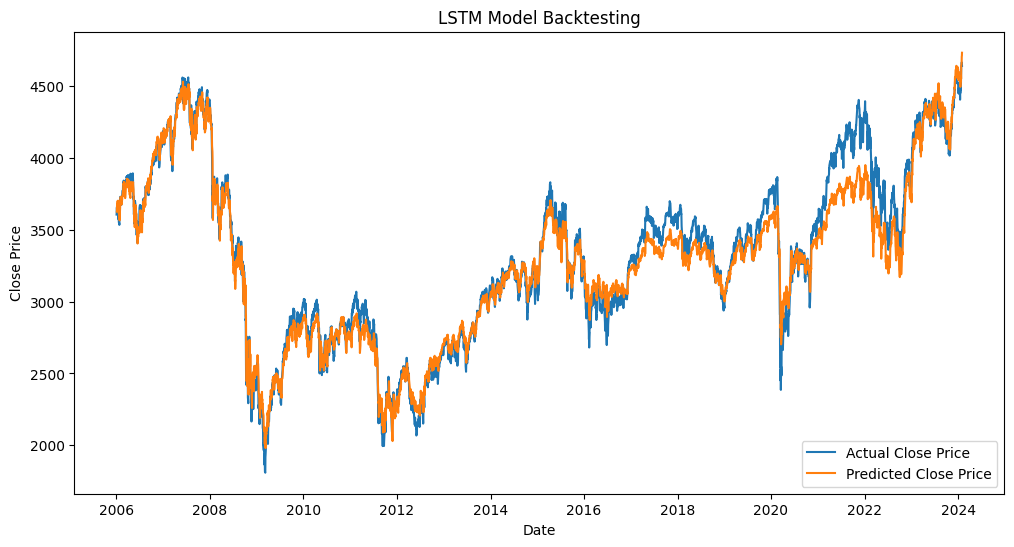

In [43]:
# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert Spark DataFrame to Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Convert to numeric
dataset_knn_pd.dropna(inplace=True)
dataset_knn_pd[['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']] = dataset_knn_pd[['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']].apply(pd.to_numeric)

# Normalize the historical data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']])

# Prepare data for backtesting
look_back = 1  # Use the same look_back as the previous model
X_backtest, Y_backtest = create_dataset(scaled_data, look_back)

# Path to the trained model
model_path = 'expanded_results.h5'

# Load the trained model
model = load_model(model_path)

# Generate predictions
predictions = model.predict(X_backtest)

# Invert predictions to original scale
predictions_inverted = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1)))))[:, 0]

# Visualization: Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(dataset_knn_pd['Date'], dataset_knn_pd['Close'], label='Actual Close Price')
plt.plot(dataset_knn_pd['Date'][look_back+1:], predictions_inverted, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Backtesting')
plt.legend()
plt.show()

# Optuna Keras Model

In [44]:
# The 'trainX' and 'trainY' are already defined and preprocessed

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be optimized
    neurons = trial.suggest_categorical('neurons', [30, 50, 100, 150])
    learning_rate = trial.suggest_categorical('learning_rate', [0.0001, 0.001, 0.01, 0.1])
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 20, 100)

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Cross-validation with time series split
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_index, val_index in tscv.split(trainX):
        X_train_fold, X_val_fold = trainX[train_index], trainX[val_index]
        y_train_fold, y_val_fold = trainY[train_index], trainY[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[KerasPruningCallback(trial, 'val_loss')])

        # Evaluate the model
        predictions = model.predict(X_val_fold)
        rmse_score = np.sqrt(mean_squared_error(y_val_fold, predictions))
        rmse_scores.append(rmse_score)

    # Return the mean RMSE score over all folds
    return np.mean(rmse_scores)

# Specify the storage location for Optuna
storage_name = "sqlite:///optuna_study.db"

# Create the Optuna study
study = optuna.create_study(direction='minimize', storage=storage_name, load_if_exists=True)
study.optimize(objective, n_trials=100)

# Print the optimal hyperparameters
print("Best trial:")
trial = study.best_trial
print(" Value: ", trial.value)
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Use the best hyperparameters to train the final model
best_neurons = trial.params['neurons']
best_lr = trial.params['learning_rate']
best_batch_size = trial.params['batch_size']
best_epochs = trial.params['epochs']

best_model = Sequential()
best_model.add(LSTM(best_neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
best_model.add(Dropout(0.2))
best_model.add(Dense(1))
best_model.compile(optimizer=Adam(learning_rate=best_lr), loss='mean_squared_error')

# Train with the full training data
best_model.fit(trainX, trainY, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

# Save the best model
best_model.save('best_model.h5')

# Save the study results to a CSV file
study_results = study.trials_dataframe()
study_results.to_csv('optuna_study_results.csv', index=False)

# To load the study from the database later:
loaded_study = optuna.load_study(study_name=study.study_name, storage=storage_name)

# To load the model
loaded_model = load_model('best_model.h5')

# Generate a link for downloading the model
model_link = FileLink('best_model.h5')
display(model_link)

[I 2024-02-01 22:53:55,806] A new study created in RDB with name: no-name-8f3fbddb-9d21-401c-9c71-051e73bf608d


16/16 [==============================] - 0s 814us/step


[I 2024-02-01 22:54:03,113] Trial 0 finished with value: 0.07099812851714363 and parameters: {'neurons': 50, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 49}. Best is trial 0 with value: 0.07099812851714363.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:54:13,349] Trial 1 finished with value: 0.06803763988078185 and parameters: {'neurons': 30, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 42}. Best is trial 1 with value: 0.06803763988078185.


16/16 [==============================] - 0s 801us/step


[I 2024-02-01 22:54:25,617] Trial 2 finished with value: 0.06935717637685963 and parameters: {'neurons': 30, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 95}. Best is trial 1 with value: 0.06803763988078185.


16/16 [==============================] - 0s 740us/step


[I 2024-02-01 22:54:40,085] Trial 3 finished with value: 0.033668756308662694 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 60}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:54:46,996] Trial 4 finished with value: 0.048915481949797265 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 63}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 922us/step


[I 2024-02-01 22:55:07,489] Trial 5 finished with value: 0.06032177846486475 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 77}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 844us/step


[I 2024-02-01 22:55:29,666] Trial 6 finished with value: 0.09494716212616752 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 85}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:55:37,265] Trial 7 finished with value: 0.11948526040851484 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 33}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:55:57,652] Trial 8 finished with value: 0.0890384060669059 and parameters: {'neurons': 30, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 91}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 814us/step


[I 2024-02-01 22:56:16,931] Trial 9 finished with value: 0.04790834845567678 and parameters: {'neurons': 50, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 81}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:56:20,354] Trial 10 finished with value: 0.08147728605269644 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 20}. Best is trial 3 with value: 0.033668756308662694.


16/16 [==============================] - 0s 784us/step


[I 2024-02-01 22:56:36,674] Trial 11 finished with value: 0.03204520018596852 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 69}. Best is trial 11 with value: 0.03204520018596852.


16/16 [==============================] - 0s 925us/step


[I 2024-02-01 22:56:51,974] Trial 12 finished with value: 0.035911442839034066 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 63}. Best is trial 11 with value: 0.03204520018596852.


16/16 [==============================] - 0s 708us/step


[I 2024-02-01 22:57:08,854] Trial 13 finished with value: 0.0380084449271256 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 71}. Best is trial 11 with value: 0.03204520018596852.


16/16 [==============================] - 0s 854us/step


[I 2024-02-01 22:57:21,369] Trial 14 finished with value: 0.036156556830768134 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 50}. Best is trial 11 with value: 0.03204520018596852.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:57:38,508] Trial 15 finished with value: 0.035851574502232274 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 69}. Best is trial 11 with value: 0.03204520018596852.


16/16 [==============================] - 0s 869us/step


[I 2024-02-01 22:57:55,205] Trial 16 finished with value: 0.03159097923306093 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 55}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:58:06,501] Trial 17 finished with value: 0.05867700351813783 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 52}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 755us/step


[I 2024-02-01 22:58:21,402] Trial 18 finished with value: 0.09960922801793633 and parameters: {'neurons': 100, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 39}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 2ms/step


[I 2024-02-01 22:58:38,654] Trial 19 finished with value: 0.14290196426844332 and parameters: {'neurons': 50, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 72}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:58:42,430] Trial 20 finished with value: 0.07968661542800173 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 25}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 901us/step


[I 2024-02-01 22:58:56,500] Trial 21 finished with value: 0.03487294569242735 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 57}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:59:10,857] Trial 22 finished with value: 0.04035386848915189 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 59}. Best is trial 16 with value: 0.03159097923306093.


16/16 [==============================] - 0s 770us/step


[I 2024-02-01 22:59:26,700] Trial 23 finished with value: 0.0304989251426833 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 66}. Best is trial 23 with value: 0.0304989251426833.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 22:59:43,519] Trial 24 finished with value: 0.030215063047830303 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 66}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 663us/step


[I 2024-02-01 22:59:54,577] Trial 25 finished with value: 0.040969785243171374 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 44}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 714us/step


[I 2024-02-01 23:00:20,760] Trial 26 finished with value: 0.030913903587971886 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 77}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 712us/step


[I 2024-02-01 23:00:49,353] Trial 27 finished with value: 0.07856605590066378 and parameters: {'neurons': 100, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 86}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 758us/step


[I 2024-02-01 23:00:58,522] Trial 28 finished with value: 0.12272061499937004 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 128, 'epochs': 74}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 727us/step


[I 2024-02-01 23:01:25,108] Trial 29 finished with value: 0.044013257278829265 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 80}. Best is trial 24 with value: 0.030215063047830303.


16/16 [==============================] - 0s 727us/step


[I 2024-02-01 23:01:45,124] Trial 30 finished with value: 0.029665209278338163 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 99}. Best is trial 30 with value: 0.029665209278338163.


16/16 [==============================] - 0s 743us/step


[I 2024-02-01 23:02:03,255] Trial 31 finished with value: 0.02544330946302394 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 733us/step


[I 2024-02-01 23:02:22,129] Trial 32 finished with value: 0.03377904629513993 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 100}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 658us/step


[I 2024-02-01 23:02:34,403] Trial 33 finished with value: 0.03643114803272869 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 98}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 745us/step


[I 2024-02-01 23:02:51,696] Trial 34 finished with value: 0.029495592422290752 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 90}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 700us/step


[I 2024-02-01 23:03:09,275] Trial 35 finished with value: 0.05650179309559903 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 92}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 724us/step


[I 2024-02-01 23:03:27,095] Trial 36 finished with value: 0.03082805332358681 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 94}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 741us/step


[I 2024-02-01 23:03:44,237] Trial 37 finished with value: 0.09794855181407013 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 90}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 755us/step


[I 2024-02-01 23:04:05,474] Trial 38 finished with value: 0.027786075066188586 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 829us/step


[I 2024-02-01 23:04:27,225] Trial 39 finished with value: 0.09540479069706274 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 86}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 732us/step


[I 2024-02-01 23:04:51,448] Trial 40 finished with value: 0.05747047090766164 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 98}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 745us/step


[I 2024-02-01 23:05:13,382] Trial 41 finished with value: 0.03028889357922484 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 609us/step


[I 2024-02-01 23:05:24,296] Trial 42 finished with value: 0.037851165765702244 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 23:05:44,656] Trial 43 finished with value: 0.0316636762763494 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 82}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 1ms/step


[I 2024-02-01 23:06:03,714] Trial 44 finished with value: 0.032573140968758726 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 750us/step


[I 2024-02-01 23:06:19,807] Trial 45 finished with value: 0.029846112662231757 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 82}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 762us/step


[I 2024-02-01 23:06:35,885] Trial 46 finished with value: 0.031243394855255437 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 83}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 741us/step


[I 2024-02-01 23:06:53,138] Trial 47 finished with value: 0.03079277899077107 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 90}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 791us/step


[I 2024-02-01 23:07:08,381] Trial 48 finished with value: 0.1095713280868577 and parameters: {'neurons': 100, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 79}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 701us/step


[I 2024-02-01 23:07:26,133] Trial 49 finished with value: 0.03004373981593405 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 773us/step


[I 2024-02-01 23:07:50,902] Trial 50 finished with value: 0.09199621551417567 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 100}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 747us/step


[I 2024-02-01 23:08:08,471] Trial 51 finished with value: 0.030893285092881077 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 763us/step


[I 2024-02-01 23:08:25,182] Trial 52 finished with value: 0.03505317715491231 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 763us/step


[I 2024-02-01 23:08:41,386] Trial 53 finished with value: 0.031427035507845265 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 84}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 762us/step


[I 2024-02-01 23:08:59,424] Trial 54 finished with value: 0.031250927636725837 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 610us/step


[I 2024-02-01 23:09:08,540] Trial 55 finished with value: 0.03715744627822359 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 76}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 771us/step


[I 2024-02-01 23:09:25,768] Trial 56 finished with value: 0.029674029133280416 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 718us/step


[I 2024-02-01 23:09:37,571] Trial 57 finished with value: 0.07068035396047129 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 128, 'epochs': 89}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 830us/step


[I 2024-02-01 23:09:59,742] Trial 58 finished with value: 0.030692968945364756 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 86}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 886us/step


[I 2024-02-01 23:10:17,379] Trial 59 finished with value: 0.028348050939327085 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 91}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 692us/step


[I 2024-02-01 23:10:36,039] Trial 60 finished with value: 0.028303055862232845 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 769us/step


[I 2024-02-01 23:10:54,803] Trial 61 finished with value: 0.028123310581350786 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 717us/step


[I 2024-02-01 23:11:13,304] Trial 62 finished with value: 0.027987560910327336 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 691us/step


[I 2024-02-01 23:11:31,575] Trial 63 finished with value: 0.035413614413297476 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 725us/step


[I 2024-02-01 23:11:51,360] Trial 64 finished with value: 0.03484228298483722 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 790us/step


[I 2024-02-01 23:12:02,587] Trial 65 finished with value: 0.0491526415644838 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 93}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 626us/step


[I 2024-02-01 23:12:14,228] Trial 66 finished with value: 0.03462192974769582 and parameters: {'neurons': 30, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 100}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 756us/step


[I 2024-02-01 23:12:30,823] Trial 67 finished with value: 0.10630614738692863 and parameters: {'neurons': 100, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 87}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 762us/step


[I 2024-02-01 23:12:53,424] Trial 68 finished with value: 0.13674885791405172 and parameters: {'neurons': 150, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 91}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 811us/step


[I 2024-02-01 23:13:11,546] Trial 69 finished with value: 0.028719260562069537 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 792us/step


[I 2024-02-01 23:13:29,585] Trial 70 finished with value: 0.03011008600535548 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 765us/step


[I 2024-02-01 23:13:47,806] Trial 71 finished with value: 0.02850172999406871 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 786us/step


[I 2024-02-01 23:14:07,907] Trial 72 finished with value: 0.031158382523600613 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 98}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 867us/step


[I 2024-02-01 23:14:26,426] Trial 73 finished with value: 0.029533398330353892 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 94}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 777us/step


[I 2024-02-01 23:14:45,832] Trial 74 finished with value: 0.029073039603620898 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 100}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 742us/step


[I 2024-02-01 23:15:04,639] Trial 75 finished with value: 0.03005558704893089 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 761us/step


[I 2024-02-01 23:15:22,547] Trial 76 finished with value: 0.05679923213808787 and parameters: {'neurons': 100, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 92}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 799us/step


[I 2024-02-01 23:15:34,089] Trial 77 finished with value: 0.043408674136248784 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 95}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 730us/step


[I 2024-02-01 23:15:56,489] Trial 78 finished with value: 0.02960952114997937 and parameters: {'neurons': 150, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 800us/step


[I 2024-02-01 23:16:15,261] Trial 79 finished with value: 0.03786102749132027 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 98}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 613us/step


[I 2024-02-01 23:16:20,778] Trial 80 finished with value: 0.09032265263153401 and parameters: {'neurons': 30, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 37}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 748us/step


[I 2024-02-01 23:16:39,669] Trial 81 finished with value: 0.03258350728370278 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 99}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 759us/step


[I 2024-02-01 23:16:58,715] Trial 82 finished with value: 0.028940832951127714 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 100}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 763us/step


[I 2024-02-01 23:17:16,622] Trial 83 finished with value: 0.028121087290022755 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 94}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 702us/step


[I 2024-02-01 23:17:34,492] Trial 84 finished with value: 0.02666154609321162 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 93}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 790us/step


[I 2024-02-01 23:17:50,765] Trial 85 finished with value: 0.029762923919660927 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 85}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 824us/step


[I 2024-02-01 23:18:13,896] Trial 86 finished with value: 0.0988350074471379 and parameters: {'neurons': 150, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 92}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 697us/step


[I 2024-02-01 23:18:31,061] Trial 87 finished with value: 0.03223196043380262 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 90}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 889us/step


[I 2024-02-01 23:18:48,898] Trial 88 finished with value: 0.03262654975836703 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 94}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 795us/step


[I 2024-02-01 23:19:02,053] Trial 89 finished with value: 0.04355811711257015 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 707us/step


[I 2024-02-01 23:19:20,611] Trial 90 finished with value: 0.0321796020324858 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 92}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 792us/step


[I 2024-02-01 23:19:39,834] Trial 91 finished with value: 0.026796976604662858 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 95}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 704us/step


[I 2024-02-01 23:19:46,319] Trial 92 finished with value: 0.05308720374660231 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 28}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 780us/step


[I 2024-02-01 23:20:05,388] Trial 93 finished with value: 0.028309399447956463 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 97}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 774us/step


[I 2024-02-01 23:20:22,911] Trial 94 finished with value: 0.025754147813209206 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 755us/step


[I 2024-02-01 23:20:40,182] Trial 95 finished with value: 0.033082916961841936 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 88}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 878us/step


[I 2024-02-01 23:21:04,432] Trial 96 finished with value: 0.05639014160756948 and parameters: {'neurons': 150, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 94}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 810us/step


[I 2024-02-01 23:21:21,095] Trial 97 finished with value: 0.03287416330060368 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 84}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 731us/step


[I 2024-02-01 23:21:38,682] Trial 98 finished with value: 0.029386534117167497 and parameters: {'neurons': 100, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 89}. Best is trial 31 with value: 0.02544330946302394.


16/16 [==============================] - 0s 622us/step


[I 2024-02-01 23:21:51,372] Trial 99 finished with value: 0.031714212697589575 and parameters: {'neurons': 50, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 96}. Best is trial 31 with value: 0.02544330946302394.


Best trial:
 Value:  0.02544330946302394
 Params: 
    neurons: 100
    learning_rate: 0.01
    batch_size: 64
    epochs: 96


/home/fabiopoli/Desktop/best_model.h5

### Saving Optuna Study Results and the Best Model

The Optuna study results are saved in a CSV format (`optuna_study_results.csv`) to provide a comprehensive and easy-to-analyze historical record of the hyperparameter optimization process. This CSV file includes detailed information about each trial, such as the hyperparameters used and the performance metrics obtained. It allows for in-depth analysis and visualization of the optimization process, enabling insights into how different hyperparameters impact model performance.

Additionally, the best-performing model is saved in an `.h5` format (`best_model.h5`). This file stores the architecture, weights, and training configuration of the trained model, allowing for easy reloading and reuse of the model without the need to retrain. It's essential for deploying the model in production or for further evaluation and testing.

By saving both the study results and the model, we ensure a comprehensive record of the optimization process and retain the ability to deploy the best-performing model efficiently.


### Table for Hyperparameter Comparison

In [58]:
import optuna
import pandas as pd
from tensorflow.keras.models import load_model
import os

# Set the path to the directory where your 'optuna_study.db' is located
# Replace 'your_desktop_path' with the actual path to your desktop environment
desktop_path = '/home/fabiopoli/Desktop/'  
storage_path = os.path.join(desktop_path, 'optuna_study.db')
storage_name = f"sqlite:///{storage_path}"

# Load the study by specifying the correct study name
# If you do not know the study name, you can retrieve all studies in the specified storage
all_studies = optuna.study.get_all_study_summaries(storage=storage_name)
study_name = all_studies[0].study_name  # Assuming there is at least one study

# Load the study
study = optuna.load_study(study_name=study_name, storage=storage_name)

# Load the best model
best_model_path = os.path.join(desktop_path, 'best_model.h5')
best_model = load_model(best_model_path)

# Now  can use 'study' and 'best_model' to perform further analysis, visualization, or backtesting

# Print the best trial (hyperparameters and the associated value)
print("Best trial:")
print(" Value: ", study.best_trial.value)
print(" Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Additionally, if you want to compare hyperparameters, you can load the saved study results from CSV
results_csv_path = os.path.join(desktop_path, 'optuna_study_results.csv')
study_results = pd.read_csv(results_csv_path)

# Now 'study_results' contains the dataframe with all the trials and their results
print(study_results.head())  # Prints the first 5 rows of the dataframe

Best trial:
 Value:  0.025305233915114272
 Params: 
    neurons: 150
    learning_rate: 0.01
    batch_size: 32
    epochs: 84
   number     value              datetime_start           datetime_complete  \
0       0  0.070998  2024-02-01 22:53:55.818578  2024-02-01 22:54:03.090677   
1       1  0.068038  2024-02-01 22:54:03.118169  2024-02-01 22:54:13.322789   
2       2  0.069357  2024-02-01 22:54:13.354350  2024-02-01 22:54:25.604781   
3       3  0.033669  2024-02-01 22:54:25.622082  2024-02-01 22:54:40.073011   
4       4  0.048915  2024-02-01 22:54:40.089904  2024-02-01 22:54:46.987888   

                 duration  params_batch_size  params_epochs  \
0  0 days 00:00:07.272099                 64             49   
1  0 days 00:00:10.204620                 32             42   
2  0 days 00:00:12.250431                 64             95   
3  0 days 00:00:14.450929                 32             60   
4  0 days 00:00:06.897984                128             63   

   params_learning_

In [57]:
# Hyperparameter importance
hyperparam_importance = ov.plot_param_importances(study)
hyperparam_importance.show()

# Optimization history
opt_history = ov.plot_optimization_history(study)
opt_history.show()

# Slice plots for all hyperparameters
for param in study.best_params.keys():
    slice_plot = ov.plot_slice(study, params=[param])
    slice_plot.show()

### Computational Efficiency

In [46]:
start_time = time.time()
model.fit(trainX, trainY, epochs=best_epochs, batch_size=best_batch_size)
training_time = time.time() - start_time

start_time = time.time()
predictions = model.predict(testX)
inference_time = time.time() - start_time

print(f"Training Time: {training_time} seconds")
print(f"Inference Time: {inference_time} seconds")

Epoch 1/96
48/48 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 2/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 3/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 5/96
48/48 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 7/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 8/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 9/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 10/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 11/96
48/48 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 12/96
48/48 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/96
48/48 [==============================

### Model Complexity Optuna Model

In [47]:
model.summary() # Gives the number of parameters
model.save("optuna_model.h5")


model_size = os.path.getsize("optuna_model.h5")
print(f"Model Size: {model_size} bytes")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                12600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12651 (49.42 KB)
Trainable params: 12651 (49.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Size: 180944 bytes


### Overfitting/Underfitting Analysis

Epoch 1/96
39/39 [==============================] - 0s 7ms/step - loss: 6.0212e-04 - val_loss: 1.5562e-04
Epoch 2/96
39/39 [==============================] - 0s 2ms/step - loss: 5.5767e-04 - val_loss: 1.8888e-04
Epoch 3/96
39/39 [==============================] - 0s 1ms/step - loss: 6.0005e-04 - val_loss: 1.6650e-04
Epoch 4/96
39/39 [==============================] - 0s 1ms/step - loss: 6.1411e-04 - val_loss: 2.2761e-04
Epoch 5/96
39/39 [==============================] - 0s 1ms/step - loss: 6.3540e-04 - val_loss: 1.6212e-04
Epoch 6/96
39/39 [==============================] - 0s 1ms/step - loss: 5.2056e-04 - val_loss: 1.7544e-04
Epoch 7/96
39/39 [==============================] - 0s 1ms/step - loss: 5.9385e-04 - val_loss: 1.6460e-04
Epoch 8/96
39/39 [==============================] - 0s 2ms/step - loss: 5.7184e-04 - val_loss: 1.6163e-04
Epoch 9/96
39/39 [==============================] - 0s 1ms/step - loss: 5.9744e-04 - val_loss: 1.6729e-04
Epoch 10/96
39/39 [===========================

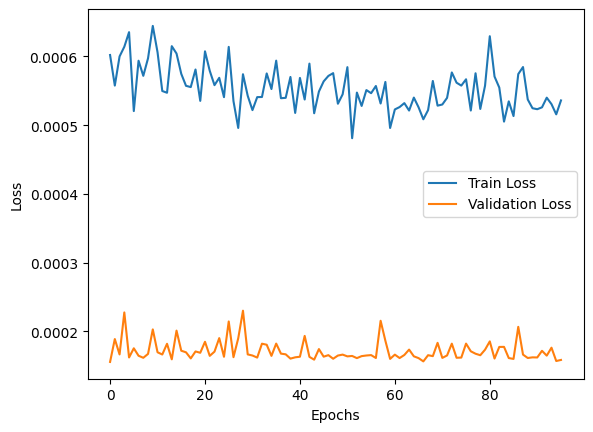

In [48]:
history = model.fit(trainX, trainY, validation_split=0.2, epochs=best_epochs, batch_size=best_batch_size)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
# Load the model
model = load_model('optuna_model.h5')

# Summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                12600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12651 (49.42 KB)
Trainable params: 12651 (49.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Backtesting: Optuna Optimization

143/143 [==============================] - 0s 1ms/step


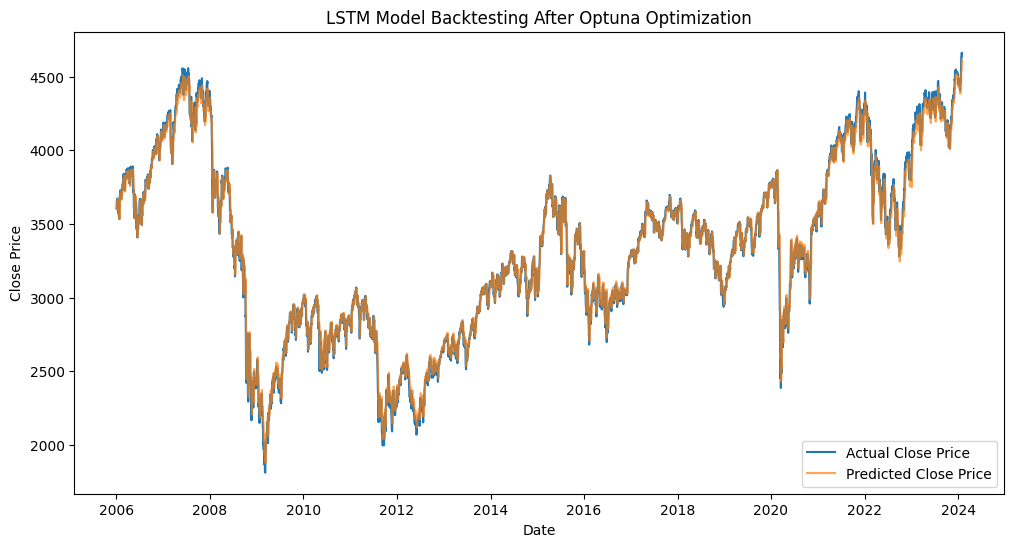

In [50]:
# Function to create a dataset with lagged features for backtesting
def create_backtest_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Assuming 'dataset_knn' is a Spark DataFrame with the same structure used during training
# Convert Spark DataFrame to Pandas DataFrame for backtesting
dataset_knn_pd = dataset_knn.toPandas()

# Convert to numeric and drop NA values
dataset_knn_pd.dropna(inplace=True)
columns_to_scale = ['Close', 'InterestRate', 'InflationRate', 'M3', 'M6', 'M9', 'Y1', 'Y3', 'Y5', 'Y10', 'Y20', 'Y30']
dataset_knn_pd[columns_to_scale] = dataset_knn_pd[columns_to_scale].apply(pd.to_numeric)

# Normalize the data using the same scaler as during training
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[columns_to_scale])

# Prepare data for backtesting using the look_back period defined during training
look_back = 1  # This should be the same look_back you used during training
X_backtest, Y_backtest_actual = create_backtest_dataset(scaled_data, look_back)

# Path where the uploaded model file is stored
best_model_path = '/home/fabiopoli/Desktop/best_model.h5'

# Load the best model saved from Optuna optimization
best_model = load_model(best_model_path)


# Generate predictions using the best model
Y_backtest_predicted = best_model.predict(X_backtest)

# Invert predictions to original scale
Y_backtest_predicted_inverted = scaler.inverse_transform(np.hstack((Y_backtest_predicted, np.zeros((Y_backtest_predicted.shape[0], scaled_data.shape[1] - 1)))))[:, 0]

# Visualization: Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(dataset_knn_pd['Date'], dataset_knn_pd['Close'], label='Actual Close Price')
plt.plot(dataset_knn_pd['Date'][look_back+1:], Y_backtest_predicted_inverted, label='Predicted Close Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Backtesting After Optuna Optimization')
plt.legend()
plt.show()
